# Training

In [4]:
import os
import evaluate
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Process Dataset
PATH = '../../dataset/test/'
images = []
labels = []

for filename in os.listdir(PATH):
  if filename.lower().endswith('.jpeg'):
    labels.append(filename[:-5])
  else:
    labels.append(filename[:-4])

  images.append(os.path.join(PATH, filename))

In [6]:
def load_templates(template_base_dir):
    templates = {}

    for char_dir in os.listdir(template_base_dir):
        char_path = os.path.join(template_base_dir, char_dir)
        if os.path.isdir(char_path):
            templates[char_dir] = []
            for filename in os.listdir(char_path):
                if filename.endswith(".png") or filename.endswith(".jpg"):
                    template_img = cv2.imread(os.path.join(char_path, filename), cv2.IMREAD_GRAYSCALE)
                    if template_img is not None:
                        templates[char_dir].append(template_img)

    return templates

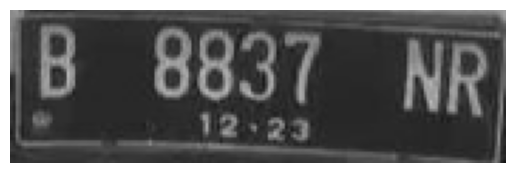

Recognized text: 


In [8]:
# Function to perform template matching and recognize characters

def template_matching_ocr(image_path, templates, threshold=0.7):
    # Load the input image
    input_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if input_image is None:
        print(f"Error: Unable to load image {image_path}")


        return

    recognized_text = ""
    h_input, w_input = input_image.shape

    # Iterate over each character class (0-9)
    for char_class, template_list in templates.items():
        best_match_val = 0
        best_char = None
        best_loc = None

        # Iterate over the templates for the current character class
        for template in template_list:
            h_template, w_template = template.shape

            # Make sure template is smaller than the input image
            if h_template <= h_input and w_template <= w_input:
                # Perform template matching
                result = cv2.matchTemplate(input_image, template, cv2.TM_CCOEFF_NORMED)
                min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

                # Update the best match if found
                if max_val > best_match_val:
                    best_match_val = max_val
                    best_char = char_class
                    best_loc = max_loc

        # Threshold and select the character with the best match
        if best_match_val > threshold:
            recognized_text += best_char
            h, w = template.shape
            # Optionally, draw rectangle around matched region
            cv2.rectangle(input_image, best_loc, (best_loc[0] + w, best_loc[1] + h), (255, 0, 0), 2)

    # Show the input image with rectangles drawn (optional)
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return recognized_text

# Set paths
template_dir = '../../dataset/templateChar/'  # Update this path to your dataset folder
input_image_path = '../../dataset/test/B8837NR.jpg'  # Path to the image you want to recognize text from

# Load templates from dataset directory
templates = load_templates(template_dir)

# Perform OCR using template matching
recognized_text = template_matching_ocr(input_image_path, templates)

# Output the recognized text
print(f"Recognized text: {recognized_text}")

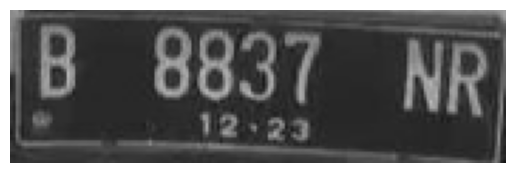

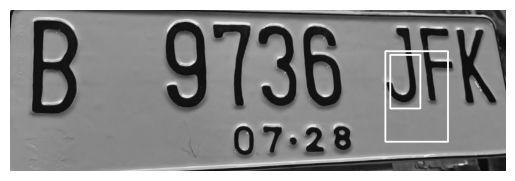

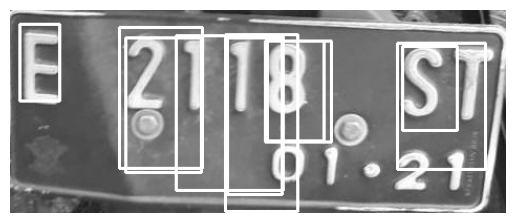

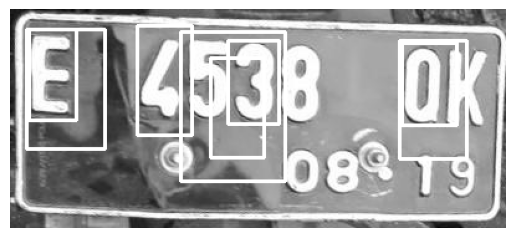

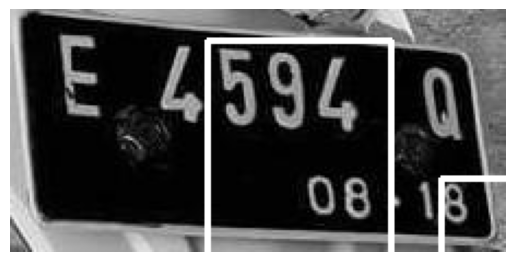

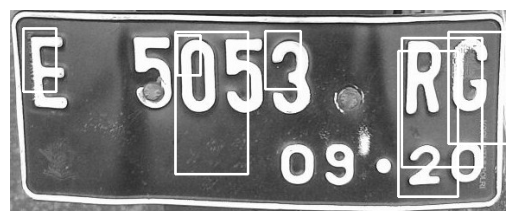

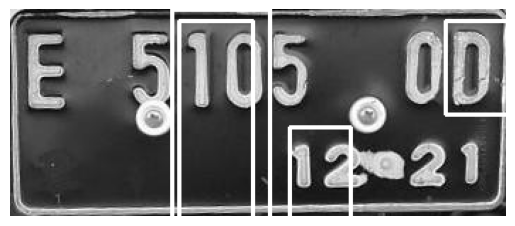

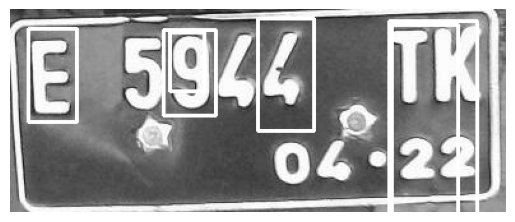

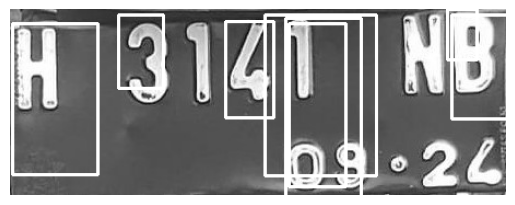

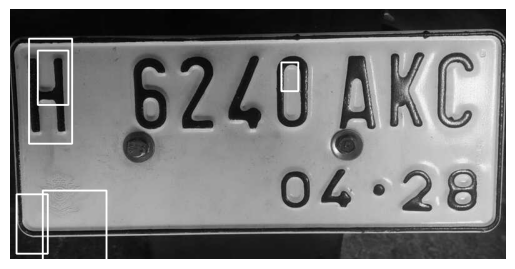

10

In [9]:
result = []
for i in images:
  result.append(template_matching_ocr(i, templates))
len(result)

# Evaluation

In [10]:
wer = evaluate.load('wer')
cer = evaluate.load('cer')

In [11]:
word_accuracy = wer.compute(references=labels, predictions=result)
character_accuracy = cer.compute(references=labels, predictions=result)

print(f'wer: {word_accuracy}, cer: {character_accuracy}')

wer: 1.0, cer: 0.9154929577464789


In [12]:
for i,x in enumerate(zip(result, labels)):
  print(i,x)

0 ('', 'B8837NR')
1 ('JT', 'B9736JFK')
2 ('1256BEISTZ', 'E2118ST')
3 ('3456BDEX', 'E4538QK')
4 ('59', 'E4594Q')
5 ('0138CEP', 'E5053RG')
6 ('1DIX', 'E5105OD')
7 ('1348EI', 'E5944TK')
8 ('1348BHIT', 'H3141NB')
9 ('18JLT', 'H6240AKC')
